In [ ]:
from entsoe import EntsoePandasClient
import pandas as pd
import os

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.width", None)  # Set width to expand to full display
pd.set_option("display.max_colwidth", None)

client = EntsoePandasClient(api_key=os.getenv("ENTSOE_API_KEY"))

start = pd.Timestamp("2024-11-10T17:00", tz="UTC")
end = pd.Timestamp("2024-11-10T18:00", tz="UTC")

# df = client.query_crossborder_flows("ES", "PT", start=start, end=end)
df = client.query_generation("PT", start=start, end=end, psr_type=None)
df = df.tz_convert("UTC")

: 

In [12]:
# df = df.resample('h').mean()
df = df.xs("Actual Aggregated", axis=1, level=1)
df

,Biomass,Fossil Gas,Fossil Hard coal,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Other,Solar,Wind Onshore
2015-01-01 00:00:00+00:00,307.0,454.0,1757.0,554.0,967.0,705.0,43.0,0.0,513.0
2015-01-01 01:00:00+00:00,310.0,446.0,1757.0,308.0,568.0,474.0,41.0,0.0,551.0
2015-01-01 02:00:00+00:00,316.0,446.0,1756.0,0.0,392.0,401.0,41.0,0.0,597.0
2015-01-01 03:00:00+00:00,315.0,448.0,1757.0,0.0,404.0,168.0,41.0,0.0,706.0
2015-01-01 04:00:00+00:00,316.0,448.0,1758.0,0.0,410.0,152.0,40.0,0.0,721.0
2015-01-01 05:00:00+00:00,316.0,448.0,1758.0,0.0,569.0,125.0,41.0,0.0,765.0
2015-01-01 06:00:00+00:00,323.0,449.0,1757.0,0.0,632.0,249.0,41.0,0.0,726.0
2015-01-01 07:00:00+00:00,320.0,449.0,1648.0,17.0,534.0,419.0,42.0,0.0,866.0
2015-01-01 08:00:00+00:00,321.0,448.0,1423.0,22.0,754.0,384.0,41.0,51.0,845.0
2015-01-01 09:00:00+00:00,325.0,445.0,1384.0,22.0,759.0,259.0,42.0,177.0,801.0


In [4]:
from data_fetcher import ENTSOEDataFetcher
import nest_asyncio
from data_fetcher import SimpleInterval
from datetime import datetime

nest_asyncio.apply()

fetcher = ENTSOEDataFetcher()
data_request = SimpleInterval(datetime(2018, 1,1,0), datetime(2024, 12,21,0))
fetcher_data = fetcher.get_data(data_request)


[_make_request_async (start)]: 16:52:47s: {'documentType': 'A11', 'in_Domain': '10YPT-REN------W', 'out_Domain': '10YES-REE------0', 'periodStart': '202412062100', 'periodEnd': '202412211500', 'securityToken': '89fec152-d36b-49c8-b0b6-4e67e57b26ea'}
[_make_request_async (start)]: 16:52:47s: {'documentType': 'A11', 'in_Domain': '10YES-REE------0', 'out_Domain': '10YPT-REN------W', 'periodStart': '202412062100', 'periodEnd': '202412211500', 'securityToken': '89fec152-d36b-49c8-b0b6-4e67e57b26ea'}
[_make_request_async (start)]: 16:52:47s: {'documentType': 'A11', 'in_Domain': '10YFR-RTE------C', 'out_Domain': '10YES-REE------0', 'periodStart': '202412062100', 'periodEnd': '202412211500', 'securityToken': '89fec152-d36b-49c8-b0b6-4e67e57b26ea'}
[_make_request_async (start)]: 16:52:47s: {'documentType': 'A11', 'in_Domain': '10YES-REE------0', 'out_Domain': '10YFR-RTE------C', 'periodStart': '202412062100', 'periodEnd': '202412211500', 'securityToken': '89fec152-d36b-49c8-b0b6-4e67e57b26ea'}


TypeError: Data.__init__() got an unexpected keyword argument 'consumption_pt'

In [3]:
len(data_request)

TypeError: object of type 'SimpleInterval' has no len()

In [ ]:
import os

BASE_URL = "https://web-api.tp.entsoe.eu/api"

params = {
    "documentType": "A73",
    "processType": "A16",
    "in_Domain": "10YFI-1--------U",
    "periodStart": "202401010000",
    "periodEnd": "202401020000",
    "psrType": "B14",
    "securityToken": os.getenv("ENTSOE_API_KEY")
}





In [20]:
import os
import asyncio
import aiohttp
from aiohttp import ClientSession, TCPConnector
from datetime import datetime, timedelta
from aiolimiter import AsyncLimiter

BASE_URL = "https://web-api.tp.entsoe.eu/api"

params = {
    "documentType": "A73",
    "processType": "A16",
    "in_Domain": "10YFI-1--------U",
    "periodStart": "202401010000",
    "periodEnd": "202401020000",
    "psrType": "B14",
    "securityToken": os.getenv("ENTSOE_API_KEY")
}

# Define date range
START_DATE = datetime(2024, 1, 1)
END_DATE = datetime(2024, 12, 27)

# Define rate limiter
rate_limiter = AsyncLimiter(max_rate=200, time_period=60)  # 200 requests per 60 seconds

# Define asynchronous request function
async def fetch(session: ClientSession, params: dict):
    async with rate_limiter:
        async with session.get(BASE_URL, params=params) as response:
            response.raise_for_status()
            return await response.text()

# Define main asynchronous function
async def main():
    connector = TCPConnector(limit=7)  # Max 7 concurrent connections
    async with aiohttp.ClientSession(connector=connector) as session:
        tasks = []
        current_date = START_DATE
        while current_date <= END_DATE:
            params['periodStart'] = current_date.strftime('%Y%m%d0000')
            params['periodEnd'] = (current_date + timedelta(days=1)).strftime('%Y%m%d0000')
            task = asyncio.create_task(fetch(session, params.copy()))
            tasks.append(task)
            current_date += timedelta(days=1)
        
        responses = []
        for i, task in enumerate(asyncio.as_completed(tasks), 1):
            try:
                response = await task
                responses.append(response)
                if i % 50 == 0:
                    print(f"Processed {i} requests")
            except Exception as e:
                print(f"Request {i} failed: {e}")
    return responses
        # Process responses as needed
        # For example, save to a file or parse the JSON
        # with open('responses.json', 'w') as f:
        #     json.dump(responses, f)

# Run the asynchronous main function
responses = await main()

Processed 50 requests
Processed 100 requests
Processed 150 requests
Processed 200 requests
Processed 250 requests
Processed 300 requests
Processed 350 requests


In [6]:
responses[0]

'<?xml version="1.0" encoding="UTF-8"?>\n<GL_MarketDocument xmlns="urn:iec62325.351:tc57wg16:451-6:generationloaddocument:3:0">\n\t<mRID>fd7a6e1821654216938615088f78c2b1</mRID>\n\t<revisionNumber>1</revisionNumber>\n\t<type>A73</type>\n\t<process.processType>A16</process.processType>\n\t<sender_MarketParticipant.mRID codingScheme="A01">10X1001A1001A450</sender_MarketParticipant.mRID>\n\t<sender_MarketParticipant.marketRole.type>A32</sender_MarketParticipant.marketRole.type>\n\t<receiver_MarketParticipant.mRID codingScheme="A01">10X1001A1001A450</receiver_MarketParticipant.mRID>\n\t<receiver_MarketParticipant.marketRole.type>A33</receiver_MarketParticipant.marketRole.type>\n\t<createdDateTime>2024-12-28T20:15:33Z</createdDateTime>\n\t<time_Period.timeInterval>\n\t\t<start>2024-01-04T00:00Z</start>\n\t\t<end>2024-01-05T00:00Z</end>\n\t</time_Period.timeInterval>\n\t<TimeSeries>\n\t\t<mRID>1</mRID>\n\t\t<businessType>A01</businessType>\n\t\t<objectAggregation>A06</objectAggregation>\n\t\t

In [27]:
import xml.etree.ElementTree as ET
import pandas as pd
from datetime import datetime, timedelta

# Sample XML data (Replace the ellipsis with your actual XML content)
def parse_xml(xml_data):
    # Define the namespace
    namespaces = {
        'ns': 'urn:iec62325.351:tc57wg16:451-6:generationloaddocument:3:0'
    }

    # Initialize a list to store the extracted data
    data = []

    # Parse the XML data
    root = ET.fromstring(xml_data)

    # Iterate through each TimeSeries element
    for ts in root.findall('ns:TimeSeries', namespaces):
        # Extract the generating unit name
        unit = ts.find('.//ns:PowerSystemResources/ns:name', namespaces)
        if unit is not None:
            unit_name = unit.text
        else:
            unit_name = None  # Handle cases where the name might be missing

        # Extract the time interval
        start_time_str = ts.find('.//ns:timeInterval/ns:start', namespaces)
        end_time_str = ts.find('.//ns:timeInterval/ns:end', namespaces)
        
        if start_time_str is not None and end_time_str is not None:
            start_time = datetime.fromisoformat(start_time_str.text.replace('Z', '+00:00'))
            end_time = datetime.fromisoformat(end_time_str.text.replace('Z', '+00:00'))
        else:
            continue  # Skip this TimeSeries if time interval is missing

        # Extract the resolution
        resolution_str = ts.find('.//ns:resolution', namespaces)
        if resolution_str is not None:
            resolution_iso = resolution_str.text
            # Assuming the resolution is in the format PT{minutes}M
            resolution_minutes = int(resolution_iso.replace('PT', '').replace('M', ''))
        else:
            resolution_minutes = 60  # Default to 60 minutes if missing

        # Iterate through each Point within the Period
        for point in ts.findall('.//ns:Point', namespaces):
            position = point.find('ns:position', namespaces)
            quantity = point.find('ns:quantity', namespaces)
            
            if position is not None and quantity is not None:
                try:
                    pos = int(position.text)
                    qty = float(quantity.text)
                except ValueError:
                    continue  # Skip if conversion fails

                # Calculate the timestamp
                timestamp = start_time + timedelta(minutes=resolution_minutes * (pos - 1))
                
                # Append the extracted information to the data list
                data.append({
                    'datetime': timestamp,
                    'value': qty,
                    'generating_unit': unit_name
                })
    return data
# Create the pandas DataFrame

parsed_data = list(map(parse_xml, responses))
df = pd.DataFrame([item for sublist in parsed_data for item in sublist])
df.set_index('datetime', inplace=True)
df = df.pivot(columns='generating_unit', values='value')

print(df)

generating_unit            Loviisa 1 G11  Loviisa 1 G12  Loviisa 2 G21  \
datetime                                                                 
2024-01-01 00:00:00+00:00          251.0          252.0          253.0   
2024-01-01 01:00:00+00:00          251.0          252.0          253.0   
2024-01-01 02:00:00+00:00          251.0          252.0          253.0   
2024-01-01 03:00:00+00:00          251.0          252.0          253.0   
2024-01-01 04:00:00+00:00          251.0          252.0          253.0   
...                                  ...            ...            ...   
2024-12-23 17:00:00+00:00          251.0          251.0          251.0   
2024-12-23 18:00:00+00:00          251.0          251.0          251.0   
2024-12-23 19:00:00+00:00          251.0          251.0          251.0   
2024-12-23 20:00:00+00:00          251.0          251.0          251.0   
2024-12-23 21:00:00+00:00          251.0          251.0          251.0   

generating_unit            Loviisa 2 

In [33]:
df.index

DatetimeIndex(['2024-01-01 00:00:00+00:00', '2024-01-01 01:00:00+00:00',
               '2024-01-01 02:00:00+00:00', '2024-01-01 03:00:00+00:00',
               '2024-01-01 04:00:00+00:00', '2024-01-01 05:00:00+00:00',
               '2024-01-01 06:00:00+00:00', '2024-01-01 07:00:00+00:00',
               '2024-01-01 08:00:00+00:00', '2024-01-01 09:00:00+00:00',
               ...
               '2024-12-23 12:00:00+00:00', '2024-12-23 13:00:00+00:00',
               '2024-12-23 14:00:00+00:00', '2024-12-23 15:00:00+00:00',
               '2024-12-23 16:00:00+00:00', '2024-12-23 17:00:00+00:00',
               '2024-12-23 18:00:00+00:00', '2024-12-23 19:00:00+00:00',
               '2024-12-23 20:00:00+00:00', '2024-12-23 21:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=8590, freq=None)

In [44]:
df_olkiluoto = df.filter(like='Olkiluoto', axis=1)
df_olkiluoto.sum(axis=1).sum()/1000/1000 # TWh


np.float64(22.691159)

In [40]:
days_since_start_of_year = (datetime(2024, 12, 23) - datetime(2024, 1, 1)).days + 1
days_since_start_of_year

358

In [39]:

print(df_olkiluoto)


generating_unit            Olkiluoto 1 B1  Olkiluoto 2 B2  Olkiluoto 3 B3
datetime                                                                 
2024-01-01 00:00:00+00:00           894.0           894.0          1554.0
2024-01-01 01:00:00+00:00           894.0           893.0          1553.0
2024-01-01 02:00:00+00:00           894.0           894.0          1553.0
2024-01-01 03:00:00+00:00           894.0           894.0          1553.0
2024-01-01 04:00:00+00:00           894.0           894.0          1553.0
...                                   ...             ...             ...
2024-12-23 17:00:00+00:00           893.0           733.0          1256.0
2024-12-23 18:00:00+00:00           892.0           733.0          1255.0
2024-12-23 19:00:00+00:00           892.0           733.0          1255.0
2024-12-23 20:00:00+00:00           892.0           733.0          1255.0
2024-12-23 21:00:00+00:00           892.0           733.0          1255.0

[8590 rows x 3 columns]


# Finland imports

In [2]:
from data_fetcher import ENTSOEDataFetcher
import nest_asyncio
from data_fetcher import SimpleInterval
from datetime import datetime
import asyncio
from tqdm import tqdm
from aiolimiter import AsyncLimiter  # To manage rate limiting

data_fetcher = ENTSOEDataFetcher()

finland_eic = "10YFI-1--------U"
neighbors = {"NO": "10YNO-0--------C", "SE": "10YSE-1--------K", "RU": "RU", "EE": "10Y1001A1001A39I"}

# Set up concurrency and rate limiting:
# Limit to a maximum of 5 concurrent requests
semaphore = asyncio.Semaphore(5)
# Limit to a maximum of 100 requests per minute
rate_limiter = AsyncLimiter(100, 60)

async def limited_get_physical_flows(*args, **kwargs):
    # Wrapper function to enforce both concurrency and rate limits
    async with semaphore:
        async with rate_limiter:
            return await data_fetcher._async_get_physical_flows(*args, **kwargs)

async def get_flows():
    # Define the time range for the flows
    start_date = datetime(2015, 2, 1)
    end_date = datetime(2025, 2, 12)
    flows = {"imports": {}, "exports": {}}
    tasks = []
    
    # Create tasks for all neighbors concurrently
    for neighbor_label, neighbor_domain in tqdm(neighbors.items(), desc="Processing neighbors", unit="neighbor"):
        import_task = asyncio.create_task(
            limited_get_physical_flows(
                out_domain=neighbor_domain,
                in_domain=finland_eic,
                start_date=start_date,
                end_date=end_date
            )
        )
        export_task = asyncio.create_task(
            limited_get_physical_flows(
                out_domain=finland_eic,
                in_domain=neighbor_domain,
                start_date=start_date,
                end_date=end_date
            )
        )
        tasks.append((neighbor_label, import_task, export_task))
    
    # Await all tasks concurrently and gather results
    for neighbor_label, import_task, export_task in tasks:
        flows["imports"][neighbor_label], flows["exports"][neighbor_label] = await asyncio.gather(import_task, export_task)
    
    return flows

# Run the async function using the current event loop (nest_asyncio is already imported)
nest_asyncio.apply()
flows_result = asyncio.get_event_loop().run_until_complete(get_flows())
print(flows_result)

Processing neighbors: 100%|██████████| 4/4 [00:00<00:00, 4002.20neighbor/s]


[_make_request_async (start)]: 15:59:23s: {'documentType': 'A11', 'in_Domain': '10YFI-1--------U', 'out_Domain': '10YNO-0--------C', 'periodStart': '201502010000', 'periodEnd': '201601270000', 'securityToken': '89fec152-d36b-49c8-b0b6-4e67e57b26ea'}
[_make_request_async (start)]: 15:59:23s: {'documentType': 'A11', 'in_Domain': '10YFI-1--------U', 'out_Domain': '10YNO-0--------C', 'periodStart': '201601270000', 'periodEnd': '201701210000', 'securityToken': '89fec152-d36b-49c8-b0b6-4e67e57b26ea'}
[_make_request_async (start)]: 15:59:23s: {'documentType': 'A11', 'in_Domain': '10YFI-1--------U', 'out_Domain': '10YNO-0--------C', 'periodStart': '201701210000', 'periodEnd': '201801160000', 'securityToken': '89fec152-d36b-49c8-b0b6-4e67e57b26ea'}
[_make_request_async (start)]: 15:59:23s: {'documentType': 'A11', 'in_Domain': '10YFI-1--------U', 'out_Domain': '10YNO-0--------C', 'periodStart': '201801160000', 'periodEnd': '201901110000', 'securityToken': '89fec152-d36b-49c8-b0b6-4e67e57b26ea'}


In [10]:
# Before concatenating, ensure each dataframe has its timestamp column set as the index
imports_dfs = [df.set_index('start_time') for df in flows_result["imports"].values()]
exports_dfs = [df.set_index('start_time') for df in flows_result["exports"].values()]

# Combine all the imports dataframes by concatenating along columns (aligning on index) and summing row-wise.
aggregated_imports = pd.concat([df["Power"] for df in imports_dfs], axis=1).sum(axis=1)
aggregated_exports = pd.concat([df["Power"] for df in exports_dfs], axis=1).sum(axis=1)

# Optionally, sort the resulting dataframes by their index (timestamp) for clarity.
aggregated_imports = aggregated_imports.sort_index()
aggregated_exports = aggregated_exports.sort_index()

# Define the final variables
imports = aggregated_imports
exports = aggregated_exports

# For debugging, print a preview of the aggregated data
print("Aggregated Imports Data:")
print(imports.head())
print("\nAggregated Exports Data:")
print(exports.head())

Aggregated Imports Data:
start_time
2015-02-01 00:00:00    1915.0
2015-02-01 01:00:00    2034.0
2015-02-01 02:00:00    2046.0
2015-02-01 03:00:00    1981.0
2015-02-01 04:00:00    2254.0
dtype: float64

Aggregated Exports Data:
start_time
2015-02-01 00:00:00    449.0
2015-02-01 01:00:00    684.0
2015-02-01 02:00:00    712.0
2015-02-01 03:00:00    668.0
2015-02-01 04:00:00    729.0
dtype: float64


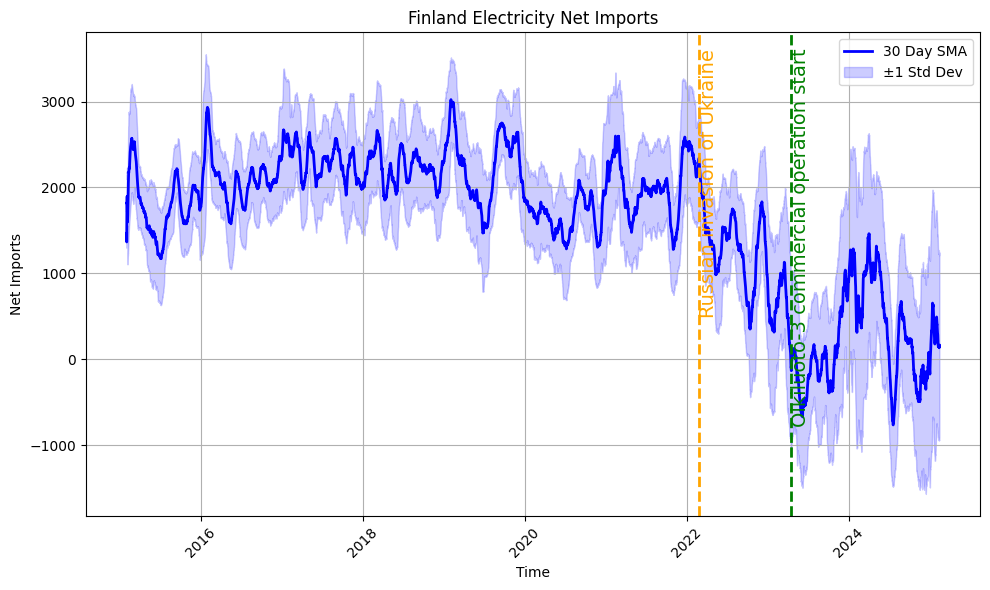

In [27]:
net_imports = imports - exports
import matplotlib.pyplot as plt
import datetime

plt.figure(figsize=(10, 6))

# Calculate smoothed mean and standard deviation using a 1-month rolling window
smoothed_mean = net_imports.rolling(window='30D').mean()
smoothed_std = net_imports.rolling(window='30D').std()

# Plot the smoothed mean along with standard deviation bands
plt.plot(net_imports.index, smoothed_mean, color='blue', linewidth=2, label='30 Day SMA')
plt.fill_between(net_imports.index, smoothed_mean - smoothed_std, smoothed_mean + smoothed_std, color='blue', alpha=0.2, label='±1 Std Dev')

# Add a vertical line at Sunday, 16 April 2023 with a label
event_date = datetime.datetime(2023, 4, 16)
plt.axvline(x=event_date, color='green', linestyle='--', linewidth=2)
ymax = plt.gca().get_ylim()[1]
plt.text(event_date, ymax * 0.95, 'Olkiluoto-3 commercial operation start',
         rotation=90, verticalalignment='top', color='green', fontsize=14)

# Add another vertical line on the day of the Ukraine invasion (24 February 2022)
invasion_date = datetime.datetime(2022, 2, 24)
plt.axvline(x=invasion_date, color='orange', linestyle='--', linewidth=2)
plt.text(invasion_date, ymax * 0.95, 'Russian invasion of Ukraine',
         rotation=90, verticalalignment='top', color='orange', fontsize=14)

plt.xlabel('Time')
plt.ylabel('Net Imports')
plt.title('Finland Electricity Net Imports')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

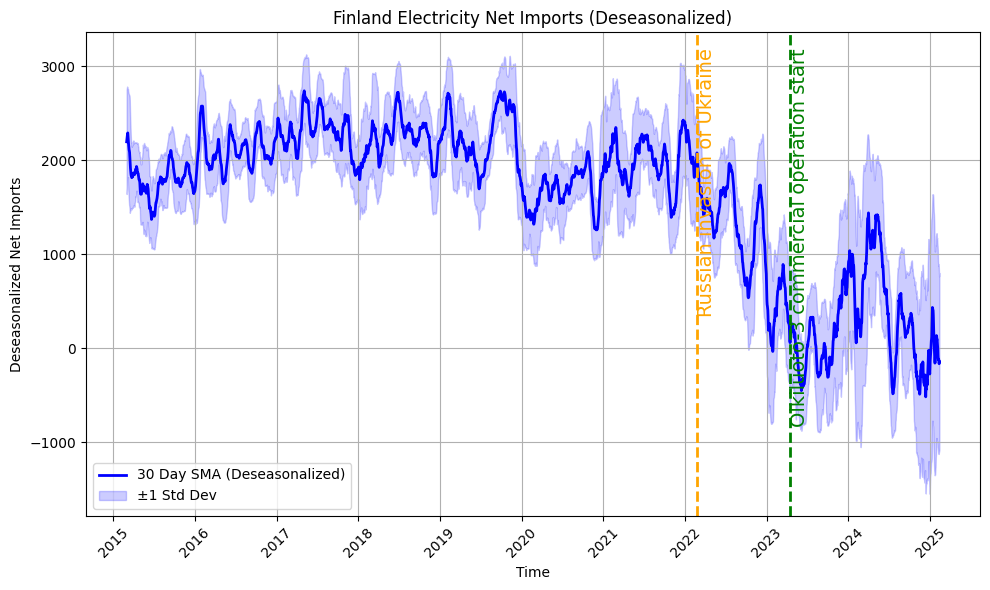

In [28]:
net_imports = imports - exports

import matplotlib.pyplot as plt
import datetime
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample net_imports from hourly to daily frequency (using the mean)
net_imports_daily = net_imports.resample('D').mean()

# Perform seasonal decomposition assuming an additive model with an annual period
decomposition = seasonal_decompose(net_imports_daily, model='additive', period=365)

# Subtract the seasonal component to obtain a deseasonalized series
deseasonalized = net_imports_daily - decomposition.seasonal

# Smooth the deseasonalized series using a 30-day rolling window
smoothed_mean = deseasonalized.rolling(window=30).mean()
smoothed_std = deseasonalized.rolling(window=30).std()

plt.figure(figsize=(10, 6))
# Plot the smoothed deseasonalized net imports along with ±1 standard deviation bands
plt.plot(deseasonalized.index, smoothed_mean, color='blue', linewidth=2, label='30 Day SMA (Deseasonalized)')
plt.fill_between(deseasonalized.index, smoothed_mean - smoothed_std, smoothed_mean + smoothed_std, 
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Add a vertical line at Olkiluoto-3 commercial operation start (Sunday, 16 April 2023)
event_date = datetime.datetime(2023, 4, 16)
plt.axvline(x=event_date, color='green', linestyle='--', linewidth=2)
ymax = plt.gca().get_ylim()[1]
plt.text(event_date, ymax * 0.95, 'Olkiluoto-3 commercial operation start',
         rotation=90, verticalalignment='top', color='green', fontsize=14)

# Add a vertical line on the day of the Ukraine invasion (24 February 2022)
invasion_date = datetime.datetime(2022, 2, 24)
plt.axvline(x=invasion_date, color='orange', linestyle='--', linewidth=2)
plt.text(invasion_date, ymax * 0.95, 'Russian invasion of Ukraine',
         rotation=90, verticalalignment='top', color='orange', fontsize=14)

plt.xlabel('Time')
plt.ylabel('Deseasonalized Net Imports')
plt.title('Finland Electricity Net Imports (Deseasonalized)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()